# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [316]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resource/city_data.csv"
ride_data_to_load = "Resource/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [317]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [318]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [319]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [320]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [321]:
#  4. Get the average fare per ride for each city type. 
fair_percents = total_fares / total_rides
fair_percents

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [322]:
# 5. Get the average fare per driver for each city type. 
driver_percents = total_fares / total_drivers
driver_percents

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [323]:
#  6. Create a PyBer summary DataFrame. 
pyber_dict = {
    "Total Rides" :total_rides, 
    "Total Drivers" : total_drivers,
    "Total Fares" : total_fares, 
    "Average Fair Per Ride" : fair_percents ,
    "Average Fair Per Driver" : driver_percents
              }
pyber_summary_df = pd.DataFrame(pyber_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fair Per Ride,Average Fair Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [324]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [325]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fair Per Ride"] = pyber_summary_df["Average Fair Per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fair Per Driver"] = pyber_summary_df["Average Fair Per Driver"].map("${:.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fair Per Ride,Average Fair Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [326]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [327]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# double brackets creates a df
total_fares_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [328]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_df = fares_df.reset_index()
total_fares_df.head()

,index,type,date,fare
0,0,Rural,2019-01-01 09:45:36,43.69
1,1,Rural,2019-01-02 11:18:32,52.12
2,2,Rural,2019-01-03 19:51:01,19.90
3,3,Rural,2019-01-04 03:31:26,24.88
4,4,Rural,2019-01-06 07:38:40,47.33


In [329]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_pivot = fares_df.pivot(index = "date", columns = "type", values = "fare" )
total_fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [330]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#alternate total_fares_by_date_df = total_fares_pivot.loc["2019-01-01" : "2019-04-28",["Rural","Suburban","Urban"] ]
total_fares_by_date_df = total_fares_pivot.loc["2019-01-01" : "2019-04-28"]
total_fares_by_date_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [331]:
#verify the datatypes
total_fares_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0+ KB


In [332]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
total_fares_by_date_df.index = pd.to_datetime(total_fares_by_date_df.index)


In [333]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# you can always change W to D as day, M for month or y as year
total_fares_by_Weekly_df = total_fares_by_date_df.resample("W").sum()

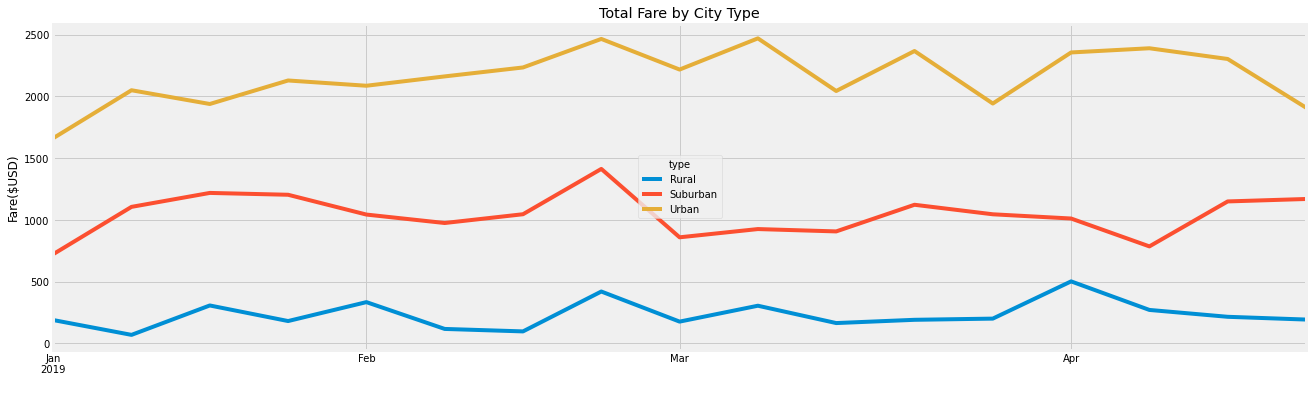

In [334]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = total_fares_by_Weekly_df.plot(figsize = (20,6))
# Add a title 
weekly_fares.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel(" ")
weekly_fares.set_ylabel("Fare($USD)")
# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
# Show Figure
plt.show()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
